In [1]:
import pandas as pd
import numpy as np
import json

# Load the training data
train_path = "/home/data/train.json"
with open(train_path, 'r') as f:
    train_data = json.load(f)

print(f"Number of training samples: {len(train_data)}")
print(f"First sample keys: {list(train_data[0].keys())}")
print(f"\nFirst sample preview:")
for key, value in list(train_data[0].items())[:10]:
    print(f"  {key}: {value}")

Number of training samples: 2878
First sample keys: ['giver_username_if_known', 'number_of_downvotes_of_request_at_retrieval', 'number_of_upvotes_of_request_at_retrieval', 'post_was_edited', 'request_id', 'request_number_of_comments_at_retrieval', 'request_text', 'request_text_edit_aware', 'request_title', 'requester_account_age_in_days_at_request', 'requester_account_age_in_days_at_retrieval', 'requester_days_since_first_post_on_raop_at_request', 'requester_days_since_first_post_on_raop_at_retrieval', 'requester_number_of_comments_at_request', 'requester_number_of_comments_at_retrieval', 'requester_number_of_comments_in_raop_at_request', 'requester_number_of_comments_in_raop_at_retrieval', 'requester_number_of_posts_at_request', 'requester_number_of_posts_at_retrieval', 'requester_number_of_posts_on_raop_at_request', 'requester_number_of_posts_on_raop_at_retrieval', 'requester_number_of_subreddits_at_request', 'requester_received_pizza', 'requester_subreddits_at_request', 'requester_u

Target Distribution:
requester_received_pizza
False    2163
True      715
Name: count, dtype: int64

Class balance: 24.84% positive class


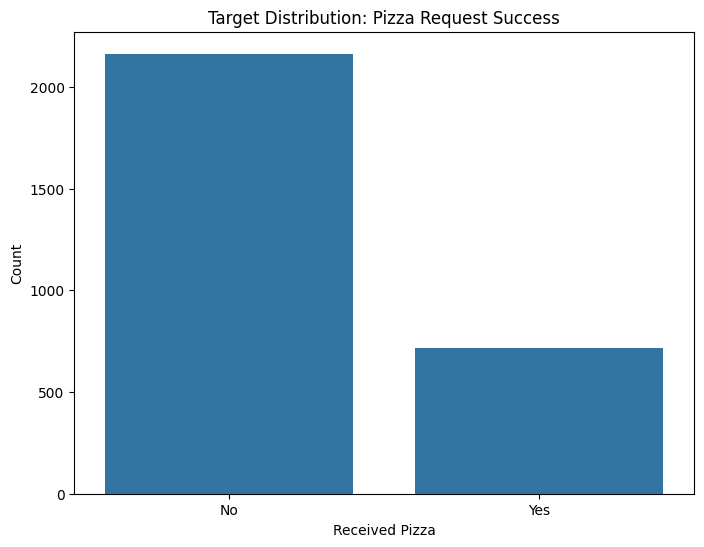


Missing values per column:
requester_user_flair    2163
dtype: int64


In [2]:
# Analyze target distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to DataFrame for easier analysis
df = pd.DataFrame(train_data)

# Target distribution
target_counts = df['requester_received_pizza'].value_counts()
print("Target Distribution:")
print(target_counts)
print(f"\nClass balance: {target_counts[True] / len(df):.2%} positive class")

# Visualize target distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=target_counts.index, y=target_counts.values)
plt.title('Target Distribution: Pizza Request Success')
plt.xlabel('Received Pizza')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()

# Check for missing values
print(f"\nMissing values per column:")
missing = df.isnull().sum()
print(missing[missing > 0])

In [3]:
# Analyze text features
print("Text Feature Analysis:")
print("=" * 50)

# Request title characteristics
df['title_length'] = df['request_title'].str.len()
print(f"Request title length - Mean: {df['title_length'].mean():.1f}, Median: {df['title_length'].median():.1f}")
print(f"Request title length - Min: {df['title_length'].min()}, Max: {df['title_length'].max()}")

# Request text characteristics
df['text_length'] = df['request_text'].str.len()
print(f"Request text length - Mean: {df['text_length'].mean():.1f}, Median: {df['text_length'].median():.1f}")
print(f"Request text length - Min: {df['text_length'].min()}, Max: {df['text_length'].max()}")

# Check for empty texts
empty_titles = (df['request_title'].str.len() == 0).sum()
empty_texts = (df['request_text'].str.len() == 0).sum()
print(f"\nEmpty titles: {empty_titles}, Empty texts: {empty_texts}")

# Sample a few texts
print("\nSample request title:")
print(df.iloc[0]['request_title'])
print("\nSample request text (first 200 chars):")
print(df.iloc[0]['request_text'][:200] + "...")

# Check edit-aware text differences
edit_diff = (df['request_text'] != df['request_text_edit_aware']).sum()
print(f"\nNumber of samples with edited text: {edit_diff}")

Text Feature Analysis:
Request title length - Mean: 71.6, Median: 64.0
Request title length - Min: 7, Max: 272
Request text length - Mean: 402.5, Median: 308.0
Request text length - Min: 0, Max: 4460

Empty titles: 0, Empty texts: 71

Sample request title:
[REQUEST] Oceanside, Ca. USA-  US Marine getting ready to deploy.

Sample request text (first 200 chars):
I will soon be going on a long deployment which I'm not aloud to discuss but willing to give some info if you ask. Just wanna eat some of the stuff America has to offer before I leave for a long time ...

Number of samples with edited text: 106


In [ ]:
# Analyze numerical/meta features
numerical_features = [
    'number_of_downvotes_of_request_at_retrieval',
    'number_of_upvotes_of_request_at_retrieval', 
    'request_number_of_comments_at_retrieval',
    'requester_account_age_in_days_at_request',
    'requester_number_of_comments_at_request',
    'requester_number_of_posts_at_request',
    'requester_upvotes_minus_downvotes_at_request',
    'requester_upvotes_plus_downvotes_at_request',
    'requester_number_of_subreddits_at_request'
]

print("Numerical Feature Analysis:")
print("=" * 50)

# Basic statistics for numerical features
stats = df[numerical_features].describe()
print(stats)

# Correlation with target
correlations = df[numerical_features + ['requester_received_pizza']].corr()['requester_received_pizza'].sort_values(ascending=False)
print(f"\nCorrelations with target:")
print(correlations)

# User flair analysis
print(f"\nUser Flair Distribution:")
flair_counts = df['requester_user_flair'].value_counts()
print(flair_counts)

# Success rate by flair
flair_success = df.groupby('requester_user_flair')['requester_received_pizza'].agg(['count', 'sum', 'mean'])
flair_success.columns = ['total', 'successful', 'success_rate']
print(f"\nSuccess rate by user flair:")
print(flair_success)